In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Analyzing Weather Dataset

In [46]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Data Science/weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [48]:
df.info

<bound method DataFrame.info of      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.0  ...           29   
1             39.0          E          W           4.0  ...           36   
2             85.0          N        NNE           6.0  ...           69   
3             54.0        WNW          W          30.0  ...           56   
4             50.0        SSE        ESE          20.0  ...           49   
..             ...        ...        ...           ...  ...          ...   
361           76.0        SSE         NW           7.0  ...           15   
362           48.0        NNW        NNW           2.0  ...           22   
363           43.0        ENE        ENE          11.0  ...           47   
364           46.0        SSW        WNW           6.0  ...           39   
365           78.0         NW        WNW          31.0  ...           13   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0         1019.7       1015.0         7         7     14.4     23.6   
1         1012.4       1008.4         5         3     17.5     25.7   
2         1009.5       1007.2         8         7     15.4     20.2   
3         1005.5       1007.0         2         7     13.5     14.1   
4         1018.3       1018.5         7         7     11.1     15.4   
..           ...          ...       ...       ...      ...      ...   
361       1016.1       1010.8         1         3     20.4     30.0   
362       1020.0       1016.9         0         1     17.2     28.2   
363       1024.0       1022.8         3         2     14.5     18.3   
364       1021.0       1016.2         6         7     15.8     25.9   
365       1009.6       1009.2         1         1     23.8     28.6   

     RainToday  RISK_MM RainTomorrow  
0           No      3.6          Yes  
1          Yes      3.6          Yes  
2          Yes     39.8          Yes  
3          Yes      2.8          Yes  
4          Yes      0.0           No  
..         ...      ...          ...  
361         No      0.0           No  
362         No      0.0           No  
363         No      0.0           No  
364         No      0.0           No  
365         No      0.0           No  

[366 rows x 22 columns]>

In [49]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


<Figure size 100x100 with 0 Axes>

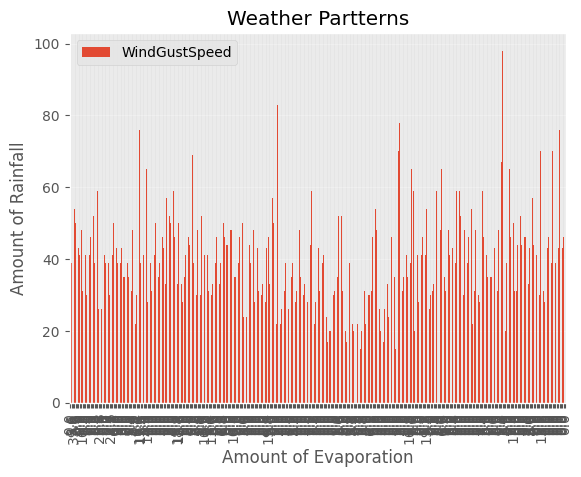

In [53]:
plt.figure(figsize=(1,1))
df.plot(kind='bar', x="Rainfall", y="WindGustSpeed")
plt.title('Weather Partterns')
plt.xlabel('Amount of Evaporation')
plt.ylabel('Amount of Rainfall')
plt.grid(alpha=0.25)

In [ ]:
plt.figure(figsize=(8,5))

# Bar chart
plt.bar(df["MinTemp"], df["Rainfall"],
        color='red', label='Rainfall (Bar)')
# Scattered chart
plt.scatter(df["MinTemp"], df["MaxTemp"],
         color='pink', marker='o',  label=' MaxTemp(Scattered)')
plt.title('Weather Pattern')
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')
plt.ylabel('MaxTemp')
plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
plt.figure(figsize=(6,6))

df.set_index("Evaporation")["Rainfall"].plot(
    kind='pie',
    autopct='%1.1f%%',
    ylabel=''   # removes the default y-label
)
plt.style.use('ggplot')
plt.title('Weather Patern - Pie Chart')
plt.show()

In [ ]:
df.info()

In [ ]:
df.shape